## Eigenvalues  Laplacian on [0,1]


$\nabla^2 u = \lambda u$



In [19]:
# add parent folder path where lib folder is
import sys

sys.path.insert(0, "..")
import pylsa
from pylsa.dmsuite import chebdif
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.sparse.linalg import eigs
from timeit import default_timer as timer

# Parameters
N = 200

# Lhs Matrix
x, L = chebdif(N - 1, 2)

len

# Rhs Matrix
M = np.eye(N)

# Apply dirichlet BC on system
# Note: 
#   Here I use the row replace method, which is not optimal
#   as it gives a system of size (N) x (N)
#   Better would be to eliminate a row, to get a system of size
#   (N-2) x (N-2)
I = np.eye(N)
# First row
L[0,:] = I[0,:]
M[0,:] = 0.
# Last row
L[-1,:] = M[-1,:]
M[-1,:] = 0.

### Direct EVP Solver

Elapsed time  0.030877
(-9.869604401078846+0j)
-160000.0
(-39.478417604237876+0j)
-160000.0
(-88.82643960977613+0j)
-160000.0
(-157.91367041600446+0j)
-160000.0
(-246.74011002720476+0j)
-160000.0
(-355.30575844351887+0j)
-160000.0
(-483.6106156512296+0j)
-160000.0
(-631.6546816697302+0j)
-160000.0
(-799.4379564903443+0j)
-160000.0
(-986.9604401061564+0j)
-160000.0
(-1194.2221325318285+0j)
-160000.0
(-1421.2230337568549+0j)
-160000.0
(-1667.9631437841042+0j)
-160000.0
(-1934.4424626135067+0j)
-160000.0
(-2220.6609902450996+0j)
-160000.0
(-2526.6187266788647+0j)
-160000.0
(-2852.3156719148474+0j)
-160000.0
(-3197.75182595295+0j)
-160000.0
(-3562.927188793272+0j)
-160000.0
(-3947.8417604357587+0j)
-160000.0
(-4352.495540880424+0j)
-160000.0
(-4776.888530127291+0j)
-160000.0
(-5221.020728176296+0j)
-160000.0
(-5684.892135027487+0j)
-160000.0
(-6168.5027506808965+0j)
-160000.0
(-6671.85257513646+0j)
-160000.0
(-7194.941608394218+0j)
-160000.0
(-7737.76985045411+0j)
-160000.0
(-8300.33730131

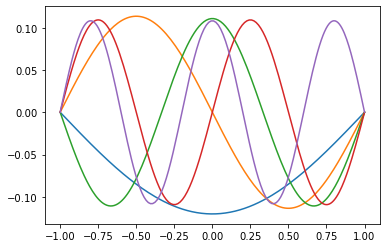

In [22]:

start = timer()
# Solve evp
eigvals, eigvecs = eig(L, M)
print("Elapsed time {:9.6f}".format(timer() - start))

# Sort
idx = np.abs(eigvals).argsort()
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Assert correctness
# <https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors_of_the_second_derivative>
for i in range(len(eigvals)):
    h = length / N
    eval_analytical = -(i + 1)**2. * np.pi**2. / length **2.#* np.sin(np.pi * (i + 1) / (2 * (N + 1))) ** 2
    # assert np.abs((eigvals[i] - eval_analytical)) < 1e-6
    print(eigvals[i])
    print(eval_analytical)

# Plot
fig, ax = plt.subplots()
for i in range(5):
    ax.plot(x, np.real(eigvecs[:, i]))
plt.show()

## Iterative EVP Solver

In [13]:
start = timer()
# Solve evp
eigvals, eigvecs = eigs(L, M = M, k=5, sigma=0)
print("Elapsed time {:9.6f}".format(timer() - start))

# Sort
idx = np.abs(eigvals).argsort()
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Assert correctness
# <https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors_of_the_second_derivative>
for i in range(len(eigvals)):
    h = length / N
    eval_analytical = -4 / (h ** 2) * np.sin(np.pi * (i + 1) / (2 * (N + 1))) ** 2
    assert np.abs((eigvals[i] - eval_analytical)) < 1e-6

# Plot
fig, ax = plt.subplots()
for i in range(5):
    ax.plot(np.linspace(0, 1, N), np.real(eigvecs[:, i]))
plt.show()

Elapsed time  0.020124


AssertionError: 